# ANÁLISE 3 

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import UnivariateSpline
%matplotlib inline

sns.set_style("whitegrid")

In [47]:
## DNS DATA

mean_re1000 = pd.read_csv("./DNS/RE1000/LM_Channel_1000_mean_prof.dat.txt", delim_whitespace=True)
variances_re1000= pd.read_csv("./DNS/RE1000/LM_Channel_1000_vel_fluc_prof.dat.txt", delim_whitespace=True)
kprof_re1000 = pd.read_csv("./DNS/RE1000/LM_Channel_1000_RSTE_k_prof.dat.txt", delim_whitespace=True)
rste_re1000_uu = pd.read_csv("./DNS/RE1000/LM_Channel_1000_RSTE_uu_prof.dat.txt", delim_whitespace=True)
rste_re1000_vv = pd.read_csv("./DNS/RE1000/LM_Channel_1000_RSTE_vv_prof.dat.txt", delim_whitespace=True)
rste_re1000_ww = pd.read_csv("./DNS/RE1000/LM_Channel_1000_RSTE_ww_prof.dat.txt", delim_whitespace=True)
rste_re1000_uv = pd.read_csv("./DNS/RE1000/LM_Channel_1000_RSTE_uv_prof.dat.txt", delim_whitespace=True)
velo_pre_dns_1000 = pd.read_csv("./DNS/RE1000/LM_Channel_1000_vp_prof.dat.txt", delim_whitespace=True)

mean_re5200 = pd.read_csv("./DNS/RE5200/LM_Channel_5200_mean_prof.dat.txt", delim_whitespace=True)
variances_re5200=pd.read_csv("./DNS/RE5200/LM_Channel_5200_vel_fluc_prof.dat.txt", delim_whitespace=True)
kprof_re5200 = pd.read_csv("./DNS/RE5200/LM_Channel_5200_RSTE_k_prof.dat.txt", delim_whitespace=True)
rste_re5200_uu = pd.read_csv("./DNS/RE5200/LM_Channel_5200_RSTE_uu_prof.dat.txt", delim_whitespace=True)
rste_re5200_vv = pd.read_csv("./DNS/RE5200/LM_Channel_5200_RSTE_vv_prof.dat.txt", delim_whitespace=True)
rste_re5200_ww = pd.read_csv("./DNS/RE5200/LM_Channel_5200_RSTE_ww_prof.dat.txt", delim_whitespace=True)
rste_re5200_uv = pd.read_csv("./DNS/RE5200/LM_Channel_5200_RSTE_uv_prof.dat.txt", delim_whitespace=True)
velo_pre_dns_5200 = pd.read_csv("./DNS/RE5200/LM_Channel_5200_vp_prof.dat.txt", delim_whitespace=True)

In [48]:
## PARÂMETROS SIMULAÇÃO LES

nu_1000 = 1e-03 #viscosidade
nu_5200 = 1.923e-04
u_tau = 1
delta = 1
dx = 2*np.pi
dz = 2*np.pi

# DIMENSÕES NORMALIZADAS

xi_1000 = [(i-0.5)*(dx/128) for i in np.arange(1,129)]
yi_1000 = [(i-0.5)*(delta/128) for i in np.arange(1,129)]
zi_1000 = [(i-0.5)*(dz/128) for i in np.arange(1,129)]

ix_dev_1000 = [(u_tau*i)/nu_1000 for i in xi_1000]
iy_dev_1000 = [(u_tau*i)/nu_1000 for i in yi_1000]
iz_dev_1000 = [(u_tau*i)/nu_1000 for i in zi_1000]

xi_5200 = [(i-0.5)*(dx/128) for i in np.arange(1,129)]
yi_5200 = [(i-0.5)*(delta/128) for i in np.arange(1,129)]
zi_5200 = [(i-0.5)*(dz/128) for i in np.arange(1,129)]

ix_dev_5200 = [(u_tau*i)/nu_5200 for i in xi_5200]
iy_dev_5200 = [(u_tau*i)/nu_5200 for i in yi_5200]
iz_dev_5200 = [(u_tau*i)/nu_5200 for i in zi_5200]

dx_1000 = ix_dev_1000[1]-ix_dev_1000[0]
dx_5200 = ix_dev_5200[1]-ix_dev_5200[0]

dy_1000 = iy_dev_1000[1]-iy_dev_1000[0]
dy_5200 = iy_dev_5200[1]-iy_dev_5200[0]

dz_1000 = iz_dev_1000[1]-iz_dev_1000[0]
dz_5200 = iz_dev_5200[1]-iz_dev_5200[0]

In [49]:
## IMPORT DADOS LES

index = np.arange(1,128*10+1)
ix = np.arange(1,129)
iy = np.arange(1,129)
iz = np.arange(1,129)

nt = 10 #blocos de tempo
it = np.arange(1,nt+1) # 1 até 10

#RE1000
aver_U_1000 = pd.read_csv("./LES/RE1000/aver_u.out.txt", delim_whitespace=True, names=ix); aver_U_1000.index = index #U
aver_V_1000 = pd.read_csv("./LES/RE1000/aver_w.out.txt", delim_whitespace=True, names=ix); aver_V_1000.index = index #V
aver_W_1000 = pd.read_csv("./LES/RE1000/aver_v.out.txt", delim_whitespace=True, names=ix); aver_W_1000.index = index #W

aver_UV_1000 = pd.read_csv("./LES/RE1000/aver_uw.out.txt", delim_whitespace=True, names=ix); aver_UV_1000.index = index #UV
aver_UW_1000 = pd.read_csv("./LES/RE1000/aver_uv.out.txt", delim_whitespace=True, names=ix); aver_UW_1000.index = index #UW
aver_VW_1000 = pd.read_csv("./LES/RE1000/aver_vw.out.txt", delim_whitespace=True, names=ix); aver_VW_1000.index = index #VW

aver_U2_1000 = pd.read_csv("./LES/RE1000/aver_U2.out.txt", delim_whitespace=True, names=ix); aver_U2_1000.index = index #U²
aver_V2_1000 = pd.read_csv("./LES/RE1000/aver_W2.out.txt", delim_whitespace=True, names=ix); aver_V2_1000.index = index #V²
aver_W2_1000 = pd.read_csv("./LES/RE1000/aver_V2.out.txt", delim_whitespace=True, names=ix); aver_W2_1000.index = index #W²

aver_U3_1000 = pd.read_csv("./LES/RE1000/aver_U3.out.txt", delim_whitespace=True, names=ix); aver_U3_1000.index = index #U³
aver_V3_1000 = pd.read_csv("./LES/RE1000/aver_W3.out.txt", delim_whitespace=True, names=ix); aver_V3_1000.index = index #V³
aver_W3_1000 = pd.read_csv("./LES/RE1000/aver_V3.out.txt", delim_whitespace=True, names=ix); aver_W3_1000.index = index #W³

aver_UUV_1000 = pd.read_csv("./LES/RE1000/aver_wu2.out.txt", delim_whitespace=True, names=ix); aver_UUV_1000.index = index #UUV
aver_WWV_1000 = pd.read_csv("./LES/RE1000/aver_wv2.out.txt", delim_whitespace=True, names=ix); aver_WWV_1000.index = index #WWV

aver_txx_1000 = pd.read_csv("./LES/RE1000/aver_txx.out.txt", delim_whitespace=True, names=ix); aver_txx_1000.index = index 
aver_txy_1000 = pd.read_csv("./LES/RE1000/aver_txz.out.txt", delim_whitespace=True, names=ix); aver_txy_1000.index = index 
aver_tzz_1000 = pd.read_csv("./LES/RE1000/aver_tyy.out.txt", delim_whitespace=True, names=ix); aver_tzz_1000.index = index 
aver_tyy_1000 = pd.read_csv("./LES/RE1000/aver_tzz.out.txt", delim_whitespace=True, names=ix); aver_tyy_1000.index = index 
aver_tyz_1000 = pd.read_csv("./LES/RE1000/aver_tyz.out.txt", delim_whitespace=True, names=ix); aver_tyz_1000.index = index

aver_P_1000 = pd.read_csv("./LES/RE1000/aver_p.out.txt", delim_whitespace=True, names=ix); aver_P_1000.index = index
aver_P2_1000= pd.read_csv("./LES/RE1000/aver_p2.out.txt", delim_whitespace=True, names=ix); aver_P2_1000.index = index
aver_VP_1000 = pd.read_csv("./LES/RE1000/aver_wp.out.txt", delim_whitespace=True, names=ix); aver_VP_1000.index = index

#RE5200

aver_U_5200 = pd.read_csv("./LES/RE5200/aver_u.out.txt", delim_whitespace=True, names=ix); aver_U_5200.index = index #U
aver_V_5200 = pd.read_csv("./LES/RE5200/aver_w.out.txt", delim_whitespace=True, names=ix); aver_V_5200.index = index #V
aver_W_5200 = pd.read_csv("./LES/RE5200/aver_v.out.txt", delim_whitespace=True, names=ix); aver_W_5200.index = index #W

aver_UV_5200 = pd.read_csv("./LES/RE5200/aver_uw.out.txt", delim_whitespace=True, names=ix); aver_UV_5200.index = index #uv
aver_UW_5200 = pd.read_csv("./LES/RE5200/aver_uv.out.txt", delim_whitespace=True, names=ix); aver_UW_5200.index = index #uw
aver_VW_5200 = pd.read_csv("./LES/RE5200/aver_vw.out.txt", delim_whitespace=True, names=ix); aver_VW_5200.index = index #vw

aver_U2_5200 = pd.read_csv("./LES/RE5200/aver_U2.out.txt", delim_whitespace=True, names=ix); aver_U2_5200.index = index #U²
aver_V2_5200 = pd.read_csv("./LES/RE5200/aver_W2.out.txt", delim_whitespace=True, names=ix); aver_V2_5200.index = index #V²
aver_W2_5200 = pd.read_csv("./LES/RE5200/aver_V2.out.txt", delim_whitespace=True, names=ix); aver_W2_5200.index = index #W²

aver_U3_5200 = pd.read_csv("./LES/RE1000/aver_U3.out.txt", delim_whitespace=True, names=ix); aver_U3_5200.index = index #U³
aver_V3_5200= pd.read_csv("./LES/RE1000/aver_W3.out.txt", delim_whitespace=True, names=ix); aver_V3_5200.index = index #V³
aver_W3_5200 = pd.read_csv("./LES/RE1000/aver_V3.out.txt", delim_whitespace=True, names=ix); aver_W3_5200.index = index #W³

aver_UUV_5200 = pd.read_csv("./LES/RE5200/aver_wu2.out.txt", delim_whitespace=True, names=ix); aver_UUV_5200.index = index #UUV
aver_WWV_5200 = pd.read_csv("./LES/RE5200/aver_wv2.out.txt", delim_whitespace=True, names=ix); aver_WWV_5200.index = index #WWV

aver_txx_5200 = pd.read_csv("./LES/RE5200/aver_txx.out.txt", delim_whitespace=True, names=ix); aver_txx_5200.index = index 
aver_txy_5200 = pd.read_csv("./LES/RE5200/aver_txz.out.txt", delim_whitespace=True, names=ix); aver_txy_5200.index = index 
aver_tzz_5200 = pd.read_csv("./LES/RE5200/aver_tyy.out.txt", delim_whitespace=True, names=ix); aver_tzz_5200.index = index 
aver_tyy_5200 = pd.read_csv("./LES/RE5200/aver_tzz.out.txt", delim_whitespace=True, names=ix); aver_tyy_5200.index = index 
aver_tyz_5200 = pd.read_csv("./LES/RE5200/aver_tyz.out.txt", delim_whitespace=True, names=ix); aver_tyz_5200.index = index 

aver_P_5200 = pd.read_csv("./LES/RE5200/aver_p.out.txt", delim_whitespace=True, names=ix); aver_P_5200.index = index
aver_P2_5200= pd.read_csv("./LES/RE5200/aver_p2.out.txt", delim_whitespace=True, names=ix); aver_P2_5200.index = index
aver_VP_5200 = pd.read_csv("./LES/RE5200/aver_wp.out.txt", delim_whitespace=True, names=ix); aver_VP_5200.index = index


In [50]:
##FUNÇÃO PARA SEPARAR OS INTERVALOS DE TEMPO

def split(aver_dict, variavel, df):   
    ind = np.arange(0,nt) #0 até 9
    
    for i,j in zip(it,ind):
        aver_dict["aver_{}_".format(variavel)+"{}".format(i)] = df.loc[j*128+1:128*i].reset_index(drop=True)

In [51]:
#### AVERAGE (U,V,W)

###------ RE1000
dict_aver_U_1000 = {} 
split(dict_aver_U_1000,"U",aver_U_1000)

dict_aver_V_1000 = {}
split(dict_aver_V_1000,"V",aver_V_1000)

dict_aver_W_1000 = {}
split(dict_aver_W_1000,"W",aver_W_1000)

###------ RE5200
dict_aver_U_5200 = {} 
split(dict_aver_U_5200,"U",aver_U_5200)

dict_aver_V_5200 = {}
split(dict_aver_V_5200,"V",aver_V_5200)

dict_aver_W_5200 = {}
split(dict_aver_W_5200,"W",aver_W_5200)

## Velocidade Média e Derivada

### Velocidade Média

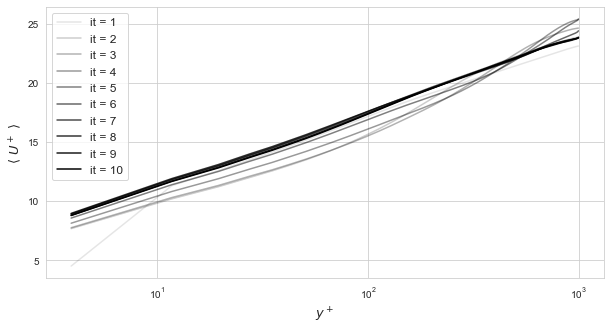

In [52]:
##EVOLUÇÃO NO TEMPO

fig = plt.figure(figsize=(10,5))

for i in range(1,11):
    plt.plot(iy_dev_1000, dict_aver_U_1000['aver_U_{}'.format(i)].mean(axis=1), label = "it = {}".format(i), alpha = 0.1*i, color = 'k')

plt.legend(fontsize=12)
plt.xscale("log")
plt.xlabel("$y^+$", fontsize= 13)
plt.ylabel("$\\langle \ {{U^+}} \ \\rangle$",fontsize=13)
#plt.savefig("steady_state.pdf")
plt.show()

In [53]:
U_mean_1000 = dict_aver_U_1000['aver_U_10'].mean(axis=1)
U_mean_5200 = dict_aver_U_5200['aver_U_10'].mean(axis=1)

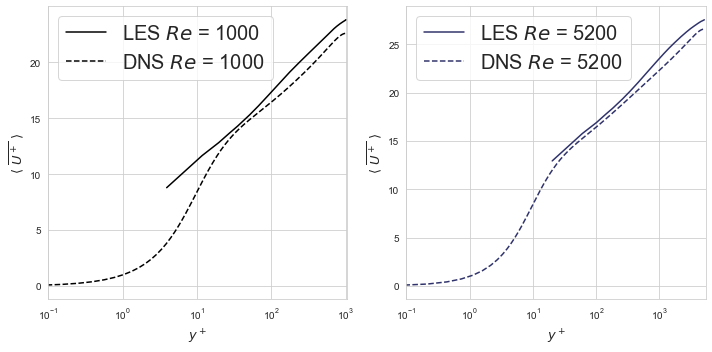

In [90]:
fig = plt.figure(figsize=(10,5))

fig_U1000_mean = fig.add_subplot(121)

plt.plot(iy_dev_1000, U_mean_1000, color= 'k', label = "LES $Re$ = 1000")
plt.plot(mean_re1000['y^+'], mean_re1000['U'], color = 'k',label = "DNS $Re$ = 1000", ls = '--')
plt.xlabel("$y^+$", fontsize= 13)
plt.ylabel("$\\langle \ {\\overline{U^+}} \ \\rangle$",fontsize=13)
plt.legend(fontsize=20)
plt.xlim(0.1)
plt.xscale("log")

fig_U5200_mean = fig.add_subplot(122)

plt.plot(iy_dev_5200, U_mean_5200, color = '#30336b', label = 'LES $Re$ = 5200')
plt.plot(mean_re5200['y^+'], mean_re5200['U'], color = '#30336b',label = "DNS $Re$ = 5200", ls = '--')
plt.xlabel("$y^+$", fontsize= 13)
plt.ylabel("$\\langle \ {\\overline{U^+}} \ \\rangle$",fontsize=13)
plt.legend(fontsize=20)
plt.xlim(0.1)
plt.xscale("log")
plt.tight_layout()
#plt.savefig("mean_velocity.pdf")
plt.show()

$$U^{+} = \frac{1}{\mathcal{K}} \ln y^+  + B$$

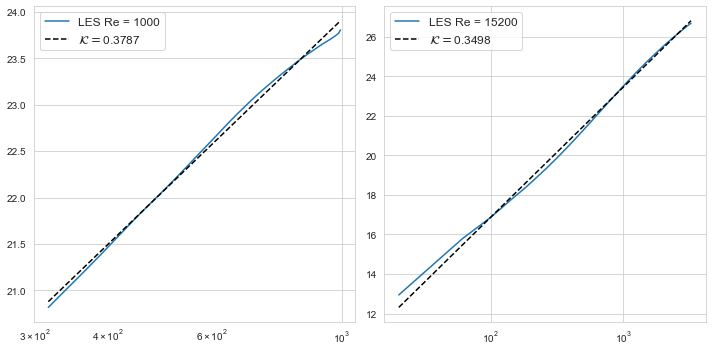

In [122]:
karman_1000 = np.polyfit(np.log(iy_dev_1000[40:]), U_mean_1000[40:],1)
karman_5200 = np.polyfit(np.log(iy_dev_5200[0:80]), U_mean_5200[0:80],1)


fig_U_log = plt.figure(figsize=(10,5))

fig_U_1000_log = fig_U_log.add_subplot(121)
plt.plot(iy_dev_1000[40:], U_mean_1000[40:], label = "LES Re = 1000")
plt.plot(iy_dev_1000[40:], [karman_1000[0]*np.log(i) + karman_1000[1] for i in iy_dev_1000[40:] ], ls = '--', color = 'k',
        label = "$\mathcal{K} = $" + "{}".format(round(1/karman_1000[0],4)))
plt.legend(fontsize=12)
plt.xscale("log")


fig_U_5200_log = fig_U_log.add_subplot(122)
plt.plot(iy_dev_5200[0:80], U_mean_5200[0:80], label = "LES Re = 15200")
plt.plot(iy_dev_5200[0:80], [karman_5200[0]*np.log(i) + karman_5200[1] for i in iy_dev_5200[0:80] ], ls = '--', color = 'k', 
        label = "$\mathcal{K} = $" + "{}".format(round(1/karman_5200[0],4)))
plt.xscale("log")
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

### Derivada

In [55]:
dUdy_1000 = (dict_aver_U_1000['aver_U_10'].diff()/dy_1000).mean(axis=1)
dUdy_5200 = (dict_aver_U_5200['aver_U_10'].diff()/dy_5200).mean(axis=1)

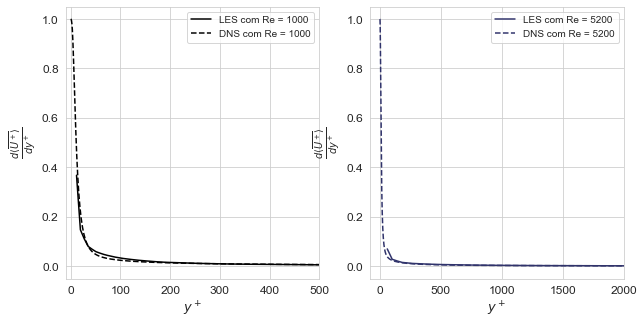

In [56]:
fig_du = plt.figure(figsize=(10,5))

fig_du_1000 = fig_du.add_subplot(121)
plt.plot(iy_dev_1000, dUdy_1000, color = 'k', label = "LES com Re = 1000")
plt.plot(mean_re1000['y^+'], mean_re1000['dU/dy'], 'k--', label = "DNS com Re = 1000")
plt.ylabel("$\\frac{d\\langle  {\\overline {U^+}}  \\rangle}{dy^+}$",fontsize=14)
plt.xlabel("$y^+$", fontsize= 13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-10,500)
plt.legend()

fig_du_5200 = fig_du.add_subplot(122)
plt.plot(iy_dev_5200, dUdy_5200, color = '#30336b', label = "LES com Re = 5200")
plt.plot(mean_re5200['y^+'], mean_re5200['dU/dy'],color = '#30336b', label = "DNS com Re = 5200", ls = '--')
plt.ylabel("$\\frac{d\\langle  {\\overline {U^+}}  \\rangle}{dy^+}$",fontsize=14)
plt.xlabel("$y^+$", fontsize= 13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-80,2000)
plt.legend()

#plt.savefig("dudy.pdf")
plt.show()

## Cálculo do tensor total

$$ \tau_{xy} = \frac{dU}{dy}-\langle  uv\rangle$$ 

In [57]:
##AVERAGE U², V², W²

#--RE1000
dict_aver_U2_1000 = {}
split(dict_aver_U2_1000,"U2",aver_U2_1000)

dict_aver_V2_1000 = {}
split(dict_aver_V2_1000,"V2",aver_V2_1000)

dict_aver_W2_1000 = {}
split(dict_aver_W2_1000,"W2",aver_W2_1000)

#--RE5200

dict_aver_U2_5200 = {}
split(dict_aver_U2_5200,"U2",aver_U2_5200)

dict_aver_V2_5200 = {}
split(dict_aver_V2_5200,"V2",aver_V2_5200)

dict_aver_W2_5200 = {}
split(dict_aver_W2_5200,"W2",aver_W2_5200)

In [58]:
## 

#UV, UW, VW
dict_aver_UV_1000 = {}
split(dict_aver_UV_1000,"UV",aver_UV_1000)

dict_aver_VW_1000 = {}
split(dict_aver_VW_1000,"VW",aver_VW_1000)

dict_aver_UW_1000 = {}
split(dict_aver_UW_1000, "UW",aver_UW_1000)

dict_aver_UV_5200 = {}
split(dict_aver_UV_5200,"UV",aver_UV_5200)

dict_aver_VW_5200 = {}
split(dict_aver_VW_5200,"VW",aver_VW_5200)

dict_aver_UW_5200 = {}
split(dict_aver_UW_5200, "UW",aver_UW_5200)

#--RE1000

dict_aver_uu_1000 = {}
dict_aver_vv_1000 = {}
dict_aver_ww_1000 = {}
dict_aver_uv_1000 = {}
dict_aver_uw_1000 = {}
dict_aver_vw_1000 = {}

#--RE5200

dict_aver_uu_5200 = {}
dict_aver_vv_5200 = {}
dict_aver_ww_5200 = {}
dict_aver_uv_5200 = {}
dict_aver_uw_5200 = {}
dict_aver_vw_5200 = {}

##CÁLCULO DAS VARIÂNCIAS

dict_aver_uu_1000['aver_uu_10'] = dict_aver_U2_1000['aver_U2_10'] - dict_aver_U_1000['aver_U_10']**2
dict_aver_vv_1000['aver_vv_10'] = dict_aver_V2_1000['aver_V2_10'] - dict_aver_V_1000['aver_V_10']**2
dict_aver_ww_1000['aver_ww_10'] = dict_aver_W2_1000['aver_W2_10'] - dict_aver_W_1000['aver_W_10']**2
dict_aver_uv_1000['aver_uv_10'] = dict_aver_UV_1000['aver_UV_10'] - 3*dict_aver_U_1000['aver_U_10']*dict_aver_V_1000['aver_V_10']
dict_aver_uw_1000['aver_uw_10'] = dict_aver_UW_1000['aver_UW_10'] - 3*dict_aver_U_1000['aver_U_10']*dict_aver_W_1000['aver_W_10']
dict_aver_vw_1000['aver_vw_10'] = dict_aver_VW_1000['aver_VW_10'] - 3*dict_aver_V_1000['aver_V_10']*dict_aver_W_1000['aver_W_10']


dict_aver_uu_5200['aver_uu_10'] = dict_aver_U2_5200['aver_U2_10'] - dict_aver_U_5200['aver_U_10']**2
dict_aver_vv_5200['aver_vv_10'] = dict_aver_V2_5200['aver_V2_10'] - dict_aver_V_5200['aver_V_10']**2
dict_aver_ww_5200['aver_ww_10'] = dict_aver_W2_5200['aver_W2_10'] - dict_aver_W_5200['aver_W_10']**2
dict_aver_uv_5200['aver_uv_10'] = dict_aver_UV_5200['aver_UV_10'] - 3*dict_aver_U_5200['aver_U_10']*dict_aver_V_5200['aver_V_10']
dict_aver_uw_5200['aver_uw_10'] = dict_aver_UW_5200['aver_UW_10'] - 3*dict_aver_U_5200['aver_U_10']*dict_aver_W_5200['aver_W_10']
dict_aver_vw_5200['aver_vw_10'] = dict_aver_VW_5200['aver_VW_10'] - 3*dict_aver_V_5200['aver_V_10']*dict_aver_W_5200['aver_W_10']

In [59]:
#--RE1000

dict_aver_s_uu_1000 = {}
split(dict_aver_s_uu_1000, "s_uu",aver_txx_1000)

dict_aver_s_uv_1000 = {}
split(dict_aver_s_uv_1000,"s_uv",aver_txy_1000)

dict_aver_s_ww_1000 = {}
split(dict_aver_s_ww_1000,"s_ww",aver_tzz_1000)


dict_aver_s_vw_1000 = {}
split(dict_aver_s_vw_1000,"s_vw",aver_tyz_1000)


dict_aver_s_vv_1000 = {}
split(dict_aver_s_vv_1000,"s_vv",aver_tyy_1000)

#--RE5200
dict_aver_s_uu_5200 = {}
split(dict_aver_s_uu_5200, "s_uu",aver_txx_5200)

dict_aver_s_uv_5200 = {}
split(dict_aver_s_uv_5200,"s_uv",aver_txy_5200)

dict_aver_s_ww_5200 = {}
split(dict_aver_s_ww_5200,"s_ww",aver_tzz_5200)

dict_aver_s_vw_5200 = {}
split(dict_aver_s_vw_5200,"s_vw",aver_tyz_5200)

dict_aver_s_vv_5200 = {}
split(dict_aver_s_vv_5200,"s_vv",aver_tyy_5200)

In [60]:
## TENSORES

## RE 1000

tau_uu_1000 = dict_aver_uu_1000['aver_uu_10'] + dict_aver_s_uu_1000['aver_s_uu_10']
tau_uv_1000 = dict_aver_uv_1000['aver_uv_10'] + dict_aver_s_uv_1000['aver_s_uv_10']
tau_uw_1000 = 0
tau_vv_1000 = dict_aver_vv_1000['aver_vv_10'] + dict_aver_s_vv_1000['aver_s_vv_10']
tau_vw_1000 = dict_aver_vw_1000['aver_vw_10'] + dict_aver_s_vw_1000['aver_s_vw_10']
tau_ww_1000 = dict_aver_ww_1000['aver_ww_10'] + dict_aver_s_ww_1000['aver_s_ww_10']

##RE 5200

tau_uu_5200 = dict_aver_uu_5200['aver_uu_10'] + dict_aver_s_uu_5200['aver_s_uu_10']
tau_uv_5200 = dict_aver_uv_5200['aver_uv_10'] + dict_aver_s_uv_5200['aver_s_uv_10']
tau_uw_5200 = 0
tau_vv_5200 = dict_aver_vv_5200['aver_vv_10'] + dict_aver_s_vv_5200['aver_s_vv_10']
tau_vw_5200 = dict_aver_vw_5200['aver_vw_10'] + dict_aver_s_vw_5200['aver_s_vw_10']
tau_ww_5200 = dict_aver_ww_5200['aver_ww_10'] + dict_aver_s_ww_5200['aver_s_ww_10']

In [61]:
tensor_dns_1000 = variances_re1000["u'v'"] - mean_re1000['dU/dy']
tensor_dns_5200 = variances_re5200["u'v'"] - mean_re5200['dU/dy']

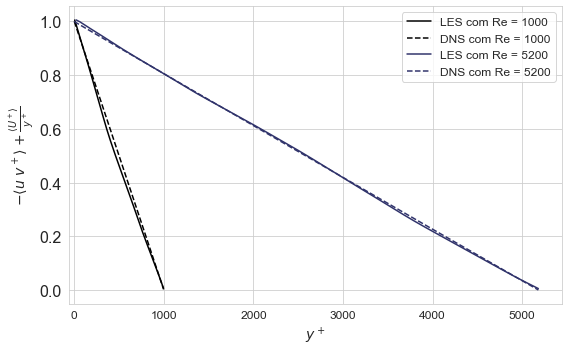

In [62]:
fig_tensor = plt.figure(figsize=(8,5))

plt.plot(iy_dev_1000, -tau_uv_1000.mean(axis=1), 'k', label = "LES com Re = 1000")
plt.plot(variances_re1000['y^+'],-tensor_dns_1000, 'k--', label = 'DNS com Re = 1000')

plt.plot(iy_dev_5200, -tau_uv_5200.mean(axis=1),color = '#30336b', label = "LES com Re = 5200")
plt.plot(variances_re5200['y^+'],-tensor_dns_5200, color = '#30336b', label = 'DNS com Re = 5200', ls = '--')

plt.xlabel("$y^+$", fontsize=14)
plt.ylabel("$-\\langle {u\ v^+} \\rangle + \\frac{\\langle U^+\\rangle}{y^+}$", fontsize=14)
plt.xlim(-60)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(np.arange(0,6000,1000),fontsize=12)
plt.yticks(fontsize=16)
plt.tight_layout()
#plt.savefig("tensor_uv.eps")
plt.show()

## Variâncias

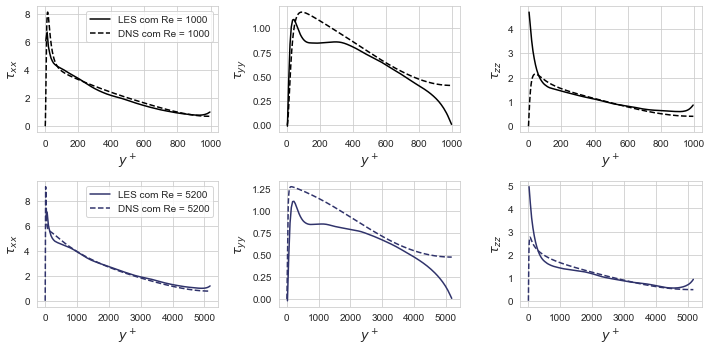

In [63]:
##RE1000

fig_variances_1000 = plt.figure(figsize=(10,5))

uu_1000 = fig_variances_1000.add_subplot(231)
plt.plot(iy_dev_1000, tau_uu_1000.mean(axis=1),color = 'k', label = "LES com Re = 1000")
plt.plot(variances_re1000['y^+'], variances_re1000["u'u'"],'k--', label = "DNS com Re = 1000")
plt.ylabel("$\\tau_{xx}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)
#plt.xlim(-10,600)
plt.legend()


vv_1000 = fig_variances_1000.add_subplot(232)
plt.plot(iy_dev_1000, tau_vv_1000.mean(axis=1),'k', label = "LES $ \\langle vv^+ \\rangle$")
plt.plot(variances_re1000['y^+'], variances_re1000["v'v'"],'k--', label = "DNS $ \\langle vv^+ \\rangle$")
plt.ylabel("$ \\tau_{yy}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)
#plt.xlim(-10,600)

ww_1000 = fig_variances_1000.add_subplot(233)
plt.plot(iy_dev_1000, tau_ww_1000.mean(axis=1),'k', label = "LES $ \\langle ww^+ \\rangle$")
plt.plot(variances_re1000['y^+'], variances_re1000["w'w'"], 'k--', label = "DNS $ \\langle ww^+ \\rangle$")
plt.ylabel("$\\tau_{zz}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)
#plt.xlim(-10,600)

### --- RE5200

uu_5200 = fig_variances_1000.add_subplot(234)
plt.plot(iy_dev_5200, tau_uu_5200.mean(axis=1),color = '#30336b', label = "LES com Re = 5200")
plt.plot(variances_re5200['y^+'], variances_re5200["u'u'"],color = '#30336b',ls = '--', label = "DNS com Re = 5200")
plt.ylabel("$\\tau_{xx}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)
plt.legend()


vv_5200 = fig_variances_1000.add_subplot(235)
plt.plot(iy_dev_5200, tau_vv_5200.mean(axis=1),color = '#30336b', label = "LES $ \\langle vv^+ \\rangle$")
plt.plot(variances_re5200['y^+'], variances_re5200["v'v'"],color = '#30336b',ls = '--', label = "DNS $ \\langle vv^+ \\rangle$")
plt.ylabel("$\\tau_{yy}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)


ww_5200 = fig_variances_1000.add_subplot(236)
plt.plot(iy_dev_5200, tau_ww_5200.mean(axis=1),color = '#30336b', label = "LES $ \\langle ww^+ \\rangle$")
plt.plot(variances_re5200['y^+'], variances_re5200["w'w'"],color = '#30336b', ls = '--', label = "DNS $ \\langle ww^+ \\rangle$")
plt.ylabel("$\\tau_{zz}$", fontsize=13)
plt.xlabel("$y^+$", fontsize=13)
plt.tight_layout()
plt.savefig("tensores_1000_5200.pdf")
plt.show()

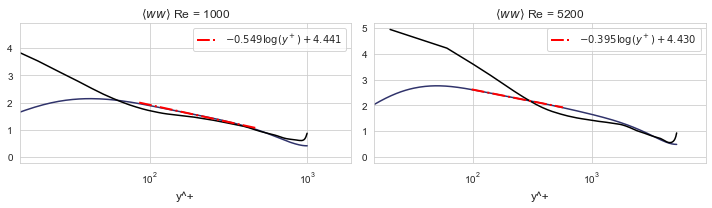

In [64]:
## ANÁLISE LOG

poly_ww_dns_1000 = np.polyfit(np.log(variances_re1000['y^+'][80:160]), variances_re1000["w'w'"][80:160],1)
poly_ww_dns_5200 = np.polyfit(np.log(variances_re5200['y^+'][80:210]), variances_re5200["w'w'"][80:210],1)

poly_uu_les_1000 = np.polyfit(np.log(iy_dev_1000[60:95]), tau_uu_1000.mean(axis=1)[60:95],1)
poly_uu_les_5200 = np.polyfit(np.log(iy_dev_5200[50:100]), tau_uu_5200.mean(axis=1)[50:100],1)


fig_uu_ww = plt.figure(figsize=(10,3))

# fig_uu_1000 = fig_uu_ww.add_subplot(221)
# plt.plot(variances_re1000['y^+'], variances_re1000["u'u'"],color = '#30336b', label = "DNS")
# plt.plot(iy_dev_1000, tau_uu_1000.mean(axis=1), color = 'k', label = "LES")

    
# plt.title("$\\langle uu \\rangle$ Re = 1000")
# plt.xlabel("y^+", fontsize=12)
# plt.xscale("log")
# plt.legend(fontsize=12)
# plt.xlim(10)

fig_ww_1000 = fig_uu_ww.add_subplot(121)
plt.plot(variances_re1000['y^+'], variances_re1000["w'w'"],color = '#30336b')
plt.plot(iy_dev_1000, tau_ww_1000.mean(axis=1), color = 'k')
plt.plot(variances_re1000['y^+'][70:170], [poly_ww_dns_1000[0]*np.log(i) + poly_ww_dns_1000[1] for 
                                           i in variances_re1000['y^+'][70:170]], color = 'red', ls = '-.', lw = 2,
        label = "$-0.549 \log(y^+) +4.441$")
plt.title("$\\langle ww \\rangle$ Re = 1000")
plt.xlabel("y^+", fontsize=12)
plt.xscale("log")
plt.xlim(15)
plt.legend()


# fig_uu_5200 = fig_uu_ww.add_subplot(223)
# plt.plot(variances_re5200['y^+'], variances_re5200["u'u'"],color = '#30336b' ,label = "DNS")
# plt.plot(iy_dev_5200, tau_uu_5200.mean(axis=1), color = 'k', label = "LES")
# plt.xscale("log")
# plt.title("$\\langle uu \\rangle$ Re = 5200")
# plt.xlim(10)
# plt.xlabel("y^+", fontsize=12)


fig_ww_5200 = fig_uu_ww.add_subplot(122)
plt.plot(variances_re5200['y^+'], variances_re5200["w'w'"],color = '#30336b')
plt.plot(iy_dev_5200, tau_ww_5200.mean(axis=1), color = 'k')
plt.plot(variances_re5200['y^+'][80:220], [poly_ww_dns_5200[0]*np.log(i) + poly_ww_dns_5200[1] for 
                                           i in variances_re5200['y^+'][80:220]], color = 'red', ls = '-.', lw = 2,
        label = "$-0.395 \log(y^+) + 4.430$")
plt.xscale("log")
plt.title("$\\langle ww \\rangle$ Re = 5200")
plt.xlim(15)
plt.legend()
plt.xlabel("y^+", fontsize=12)


plt.tight_layout()

## Energia Cinética

### Energia Cinética Turbulenta

$$ k = \frac{1}{2} \tau_{ii}$$

In [65]:
ECT_1000 = 0.5 * (tau_uu_1000 + tau_vv_1000 + tau_ww_1000)
ECT_5200 = 0.5 * (tau_uu_5200 + tau_vv_5200 + tau_ww_5200)

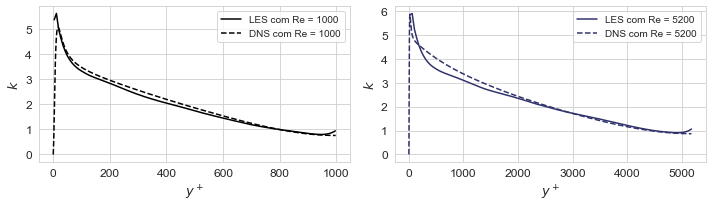

In [66]:
fig_ect = plt.figure(figsize=(10,3))

fig_ect_1000 = fig_ect.add_subplot(121)
plt.plot(iy_dev_1000, ECT_1000.mean(axis=1),'k', label = "LES com Re = 1000")
plt.plot(variances_re1000['y^+'], variances_re1000['k'],'k--',label="DNS com Re = 1000")
plt.xlabel("$y^+$", fontsize=13)
plt.ylabel("$k$", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

fig_ect_5200 = fig_ect.add_subplot(122)
plt.plot(iy_dev_5200, ECT_5200.mean(axis=1),color = '#30336b', label = "LES com Re = 5200")
plt.plot(variances_re5200['y^+'], variances_re5200['k'],color = '#30336b',label="DNS com Re = 5200", ls = '--')
plt.xlabel("$y^+$", fontsize=13)
plt.ylabel("$k$", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

### Energia Cinética Média

$$ E = \frac{1}{2} \overline{\textbf{U}} \cdot \overline{\textbf{U}}$$

In [67]:
ECM_1000 = 0.5 * (dict_aver_U_1000['aver_U_10']**2 + dict_aver_V_1000['aver_V_10']**2 + dict_aver_W_1000['aver_W_10']**2)
ECM_5200 = 0.5 * (dict_aver_U_5200['aver_U_10']**2 + dict_aver_V_5200['aver_V_10']**2 + dict_aver_W_5200['aver_W_10']**2)

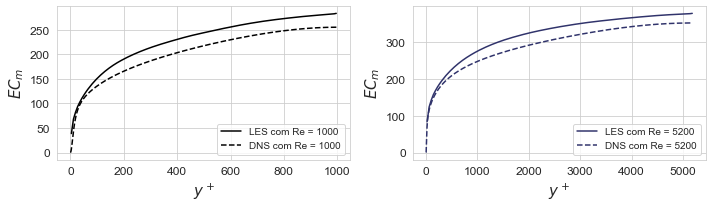

In [68]:
fig_ecm = plt.figure(figsize=(10,3))

fig_ecm_1000 = fig_ecm.add_subplot(121)
plt.plot(iy_dev_1000, ECM_1000.mean(axis=1), color = 'k', label = "LES com Re = 1000")
plt.plot(mean_re1000['y^+'], 0.5*mean_re1000['U']**2,'k--', label = "DNS com Re = 1000")
plt.xlabel("$y^+$", fontsize= 15)
plt.ylabel("$EC_m$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

fig_ecm_5200 = fig_ecm.add_subplot(122)
plt.plot(iy_dev_5200, ECM_5200.mean(axis=1), color = '#30336b', label = "LES com Re = 5200")
plt.plot(mean_re5200['y^+'], 0.5*mean_re5200['U']**2,color = '#30336b', label = "DNS com Re = 5200", ls = '--')
plt.xlabel("$y^+$", fontsize= 15)
plt.ylabel("$EC_m$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

## Produção e Dissipação

### Produção

$$ \mathcal{P} = - \tau_{ij} \overline{S}_{ij}$$

In [69]:
tij_r_1000 = {}
tij_r_5200 = {}


for i in range(1,129):
    tij_r = pd.DataFrame(columns = ['t_uu', 't_uv', 't_uw', 't_vu', 't_vv', 't_vw', 't_wu', 't_wv', 't_ww'])
    
    tij_r['t_uu'] = tau_uu_1000[i]
    tij_r['t_uv'] = tau_uv_1000[i]
    tij_r['t_uw'] = 0
    tij_r['t_vu'] = tau_uv_1000[i]
    tij_r['t_vv'] = tau_vv_1000[i]
    tij_r['t_vw'] = tau_vw_1000[i]
    tij_r['t_wu'] = 0
    tij_r['t_wv'] = tau_vw_1000[i]
    tij_r['t_ww'] = tau_uv_1000[i]
    
    tij_r_1000['n_{}'.format(i)] = tij_r
    
for i in range(1,129):
    tij_r = pd.DataFrame(columns = ['t_uu', 't_uv', 't_uw', 't_vu', 't_vv', 't_vw', 't_wu', 't_wv', 't_ww'])
    
    tij_r['t_uu'] = tau_uu_5200[i]
    tij_r['t_uv'] = tau_uv_5200[i]
    tij_r['t_uw'] = 0
    tij_r['t_vu'] = tau_uv_5200[i]
    tij_r['t_vv'] = tau_vv_5200[i]
    tij_r['t_vw'] = tau_vw_5200[i]
    tij_r['t_wu'] = 0
    tij_r['t_wv'] = tau_vw_5200[i]
    tij_r['t_ww'] = tau_uv_5200[i]
    
    tij_r_5200['n_{}'.format(i)] = tij_r

In [70]:
S_ij_1000 = {}
S_ij_5200 = {}


grad_1000= {}
grad_5200= {}

for i in range(1,129):
    gradi_1000 = pd.DataFrame(columns = ['dUdx', 'dUdy', 'dUdz', 'dVdx', 'dVdy', 'dVdz', 'dWdx', 'dWdy', 'dWdz'])
    
    gradi_1000['dUdx'] = (dict_aver_U_1000['aver_U_10'].diff(axis=1)/dx_1000)[i]
    gradi_1000['dUdy'] = (dict_aver_U_1000['aver_U_10'].diff(axis=0)/dy_1000)[i]
    gradi_1000['dUdz'] = (dict_aver_U_1000['aver_U_10'].diff(axis=1)/dz_1000)[i]
    
    gradi_1000['dVdx'] = (dict_aver_V_1000['aver_V_10'].diff(axis=1)/dx_1000)[i]
    gradi_1000['dVdy'] = (dict_aver_V_1000['aver_V_10'].diff(axis=0)/dy_1000)[i]
    gradi_1000['dVdz'] = (dict_aver_V_1000['aver_V_10'].diff(axis=1)/dz_1000)[i]
    
    gradi_1000['dWdx'] = (dict_aver_W_1000['aver_W_10'].diff(axis=1)/dx_1000)[i]
    gradi_1000['dWdy'] = (dict_aver_W_1000['aver_W_10'].diff(axis=0)/dy_1000)[i]
    gradi_1000['dWdz'] = (dict_aver_W_1000['aver_W_10'].diff(axis=1)/dz_1000)[i]
    
    grad_1000['n_{}'.format(i)] = gradi_1000.fillna(0)
    
    
    gradi_5200 = pd.DataFrame(columns = ['dUdx', 'dUdy', 'dUdz', 'dVdx', 'dVdy', 'dVdz', 'dWdx', 'dWdy', 'dWdz'])
    
    gradi_5200['dUdx'] = (dict_aver_U_5200['aver_U_10'].diff(axis=1)/dx_5200)[i]
    gradi_5200['dUdy'] = (dict_aver_U_5200['aver_U_10'].diff(axis=0)/dy_5200)[i]
    gradi_5200['dUdz'] = (dict_aver_U_5200['aver_U_10'].diff(axis=1)/dz_5200)[i]
    
    gradi_5200['dVdx'] = (dict_aver_V_5200['aver_V_10'].diff(axis=1)/dx_5200)[i]
    gradi_5200['dVdy'] = (dict_aver_V_5200['aver_V_10'].diff(axis=0)/dy_5200)[i]
    gradi_5200['dVdz'] = (dict_aver_V_5200['aver_V_10'].diff(axis=1)/dz_5200)[i]
    
    gradi_5200['dWdx'] = (dict_aver_W_5200['aver_W_10'].diff(axis=1)/dx_5200)[i]
    gradi_5200['dWdy'] = (dict_aver_W_5200['aver_W_10'].diff(axis=0)/dy_5200)[i]
    gradi_5200['dWdz'] = (dict_aver_W_5200['aver_W_10'].diff(axis=1)/dz_5200)[i]
    
    grad_5200['n_{}'.format(i)] = gradi_5200.fillna(0)
    
    
for i in range(1,129):
    S_ij_1000['n_{}'.format(i)] = 0.5*(grad_1000['n_{}'.format(i)].to_numpy().reshape(-1,3,3) + 
                                  grad_1000['n_{}'.format(i)].to_numpy().reshape(-1,3,3).swapaxes(1,2))
    
    S_ij_5200['n_{}'.format(i)] = 0.5*(grad_5200['n_{}'.format(i)].to_numpy().reshape(-1,3,3) + 
                                  grad_5200['n_{}'.format(i)].to_numpy().reshape(-1,3,3).swapaxes(1,2)) 

P_1000 = pd.DataFrame()
P_5200 = pd.DataFrame()

for i in range(1,129):
    pp_1000 = []
    pp_5200 = []
    for j in range(0,128):
        Q_1000 = tij_r_1000['n_{}'.format(i)].to_numpy().reshape(-1,3,3)
        S_1000 = S_ij_1000['n_{}'.format(i)]
        
        Q_5200 = tij_r_5200['n_{}'.format(i)].to_numpy().reshape(-1,3,3)
        S_5200 = S_ij_5200['n_{}'.format(i)]
        
        pp_1000.append(np.tensordot(Q_1000[j], S_1000[j]))
        pp_5200.append(np.tensordot(Q_5200[j], S_5200[j]))
        
    P_1000['n_{}'.format(i)] = pp_1000
    P_5200['n_{}'.format(i)] = pp_5200
    
P_1000 *=-1
P_5200 *=-1

[]

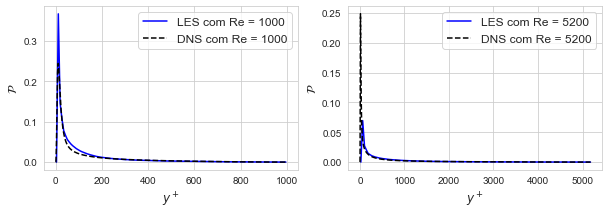

In [71]:
fig_prod = plt.figure(figsize=(10,3))

fig_prod_1000 = fig_prod.add_subplot(121)
plt.plot(iy_dev_1000,P_1000.mean(axis=1), label = "LES com Re = 1000", color = 'b')
plt.plot(kprof_re1000['y^+'], kprof_re1000['Production'], label = "DNS com Re = 1000", color = 'k', ls = '--')
plt.legend(fontsize=12)
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\mathcal{P}$", fontsize=12)

fig_prod_5200 = fig_prod.add_subplot(122)
plt.plot(iy_dev_5200,P_5200.mean(axis=1), label = "LES com Re = 5200", color = 'b')
plt.plot(kprof_re5200['y^+'], kprof_re5200['Production'], label = "DNS com Re = 5200", color = 'k', ls = '--')
plt.legend(fontsize=12)
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\mathcal{P}$", fontsize=12)
plt.plot()

### Dissipação

In [72]:
e_1000 = P_1000.mean(axis=1)
e_5200 = P_5200.mean(axis=1)

[]

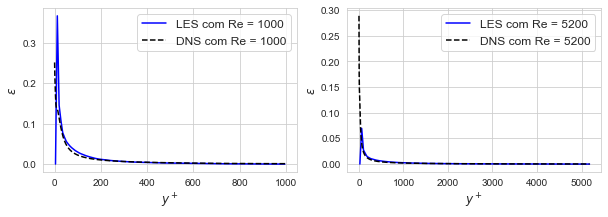

In [73]:
fig_dis = plt.figure(figsize=(10,3))

fig_dis_1000 = fig_dis.add_subplot(121)
plt.plot(iy_dev_1000,e_1000, label = "LES com Re = 1000", color = 'b')
plt.plot(kprof_re1000['y^+'], kprof_re1000['Viscous_Dissipation'], label = "DNS com Re = 1000", color = 'k', ls = '--')
plt.legend(fontsize=12)
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\epsilon$", fontsize=12)

fig_dis_5200 = fig_dis.add_subplot(122)
plt.plot(iy_dev_5200,e_5200, label = "LES com Re = 5200", color = 'b')
plt.plot(kprof_re5200['y^+'], kprof_re5200['Viscous_Dissipation'], label = "DNS com Re = 5200", color = 'k', ls = '--')
plt.legend(fontsize=12)
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\epsilon$", fontsize=12)
plt.plot()

## Transporte Turbulento

$$ - \frac{d}{dy} \langle  \frac{1}{2} v \textbf{u} \cdot \textbf{u}\rangle$$

In [74]:
#RE 1000
dict_aver_U3_1000 = {}
split(dict_aver_U3_1000,"U3",aver_U3_1000)

dict_aver_V3_1000 = {}
split(dict_aver_V3_1000,"V3",aver_V3_1000)

dict_aver_W3_1000 = {}
split(dict_aver_W3_1000,"W3",aver_W3_1000)

dict_aver_UUV_1000 = {}
split(dict_aver_UUV_1000,"UUV",aver_UUV_1000)

dict_aver_WWV_1000 = {}
split(dict_aver_WWV_1000,"WWV",aver_WWV_1000)


#RE5200
dict_aver_U3_5200 = {}
split(dict_aver_U3_5200,"U3",aver_U3_5200)

dict_aver_V3_5200 = {}
split(dict_aver_V3_5200,"V3",aver_V3_5200)

dict_aver_W3_5200 = {}
split(dict_aver_W3_5200,"W3",aver_W3_5200)

dict_aver_UUV_5200 = {}
split(dict_aver_UUV_5200,"UUV",aver_UUV_5200)

dict_aver_WWV_5200 = {}
split(dict_aver_WWV_5200,"WWV",aver_WWV_5200)

In [75]:
# RE = 1000
UUV_1000 = dict_aver_UUV_1000['aver_UUV_10']
UUU_1000 = dict_aver_U3_1000['aver_U3_10']
UU_1000 = dict_aver_U2_1000['aver_U2_10']
UV_1000 = dict_aver_UV_1000['aver_UV_10']
U_1000 = dict_aver_U_1000['aver_U_10']

VVV_1000 = dict_aver_V3_1000['aver_V3_10']
VV_1000 = dict_aver_V2_1000['aver_V2_10']
VW_1000 = dict_aver_VW_1000['aver_VW_10']
V_1000 = dict_aver_V_1000['aver_V_10']

WWV_1000 = dict_aver_WWV_1000['aver_WWV_10']
WWW_1000 = dict_aver_W3_1000['aver_W3_10']
WW_1000 = dict_aver_W2_1000['aver_W2_10']
W_1000 = dict_aver_W_1000['aver_W_10']


# RE = 5200
UUV_5200 = dict_aver_UUV_5200['aver_UUV_10']
UUU_5200 = dict_aver_U3_5200['aver_U3_10']
UU_5200 = dict_aver_U2_5200['aver_U2_10']
UV_5200 = dict_aver_UV_5200['aver_UV_10']
U_5200 = dict_aver_U_5200['aver_U_10']

VVV_5200 = dict_aver_V3_5200['aver_V3_10']
VV_5200 = dict_aver_V2_5200['aver_V2_10']
VW_5200 = dict_aver_VW_5200['aver_VW_10']
V_5200 = dict_aver_V_5200['aver_V_10']

WWV_5200 = dict_aver_WWV_5200['aver_WWV_10']
WWW_5200 = dict_aver_W3_5200['aver_W3_10']
WW_5200 = dict_aver_W2_5200['aver_W2_10']
W_5200 = dict_aver_W_5200['aver_W_10']

In [76]:
tt_1000 = (UUV_1000 - UU_1000*V_1000 - 2*UV_1000*U_1000 + 2*U_1000**2 * V_1000 + VVV_1000 - 3*VV_1000*V_1000 + WWV_1000 - 2*VW_1000*W_1000 + V_1000*U_1000**2 + 
           3*V_1000**3 + V_1000*W_1000**2 - WW_1000*V_1000 + 2*W_1000**2*V_1000 - U_1000**2*V_1000 - V_1000**3 - V_1000*W_1000**2)

turbulent_transport_1000 = -1*tt_1000.diff(axis=0)/dy_1000


tt_5200 = (UUV_5200 - UU_5200*V_5200 - 2*UV_5200*U_5200 + 2*U_5200**2 * V_5200 + VVV_5200 - 3*VV_5200*V_5200 + WWV_5200 - 2*VW_5200*W_5200 + V_5200*U_5200**2 + 
           3*V_5200**3 + V_5200*W_5200**2 - WW_5200*V_5200 + 2*W_5200**2*V_5200 - U_5200**2*V_5200 - V_5200**3 - V_5200*W_5200**2)

turbulent_transport_5200 = -1*tt_5200.diff(axis=0)/dy_5200

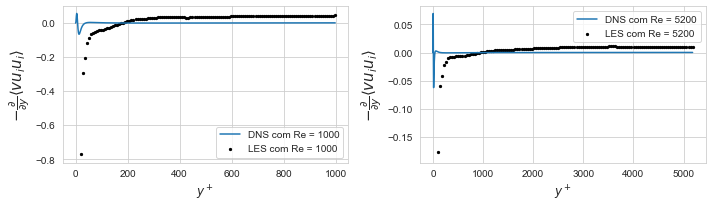

In [77]:
fig_turbulent_transport = plt.figure(figsize=(10,3))

fig_tt_1000 = fig_turbulent_transport.add_subplot(121)
plt.scatter(iy_dev_1000[2:], turbulent_transport_1000.mean(axis=1)[2:], label = "LES com Re = 1000", color = 'k', s = 5)
plt.plot(kprof_re1000['y^+'], kprof_re1000['Turbulent_Transport'], label = "DNS com Re = 1000")
plt.ylabel("$- \\frac{\partial}{\partial y} \\langle v u_i u_i \\rangle$", fontsize=15)
plt.xlabel("$y^+$", fontsize=12)
plt.legend()

fig_tt_5200 = fig_turbulent_transport.add_subplot(122)
plt.scatter(iy_dev_5200[2:], turbulent_transport_5200.mean(axis=1)[2:], label = "LES com Re = 5200", color = 'k', s = 5)
plt.plot(kprof_re5200['y^+'], kprof_re5200['Turbulent_Transport'], label = "DNS com Re = 5200")
plt.ylabel("$- \\frac{\partial}{\partial y} \\langle v u_i u_i \\rangle$", fontsize=15)
plt.xlabel("$y^+$", fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

## Difusão Viscosa

$$ \nu \frac{d^2 k}{dy}$$

In [78]:
k_1000 = 0.5 * (dict_aver_uu_1000['aver_uu_10'] + dict_aver_vv_1000['aver_vv_10'] + dict_aver_ww_1000['aver_ww_10']).mean(axis=1)

from scipy.interpolate import InterpolatedUnivariateSpline

k_poly_1000 = InterpolatedUnivariateSpline(iy_dev_1000,k_1000)

viscous_transport_poly_1000 = InterpolatedUnivariateSpline.derivative(k_poly_1000,2)

viscous_transport_1000 = [viscous_transport_poly_1000(i) for i in iy_dev_1000]


k_5200 = 0.5 * (dict_aver_uu_5200['aver_uu_10'] + dict_aver_vv_5200['aver_vv_10'] + dict_aver_ww_5200['aver_ww_10']).mean(axis=1)

from scipy.interpolate import InterpolatedUnivariateSpline

k_poly_5200 = InterpolatedUnivariateSpline(iy_dev_5200,k_5200)

viscous_transport_poly_5200 = InterpolatedUnivariateSpline.derivative(k_poly_5200,2)

viscous_transport_5200 = [viscous_transport_poly_5200(i) for i in iy_dev_5200]

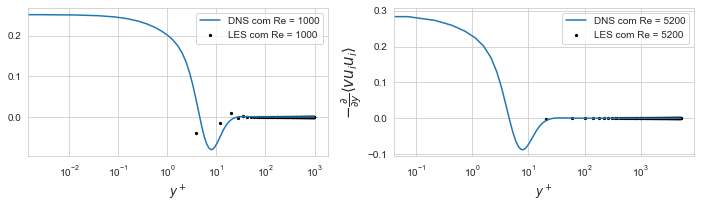

In [79]:
fig_dif_viscous = plt.figure(figsize=(10,3))

fig_dif_viscous_1000 = fig_dif_viscous.add_subplot(121)
plt.scatter(iy_dev_1000, viscous_transport_1000, label = "LES com Re = 1000", color = 'k', s = 5)
plt.plot(kprof_re1000['y^+'], kprof_re1000['Viscous_Transport'], label = "DNS com Re = 1000")
plt.xlabel("$y^+$", fontsize=12)
plt.xscale("log")
plt.legend()

fig_dif_viscous_5200 = fig_dif_viscous.add_subplot(122)
plt.scatter(iy_dev_5200, viscous_transport_5200, label = "LES com Re = 5200", color = 'k', s = 5)
plt.plot(kprof_re5200['y^+'], kprof_re5200['Viscous_Transport'], label = "DNS com Re = 5200")
plt.xlabel("$y^+$", fontsize=12)
plt.xscale("log")
plt.ylabel("$- \\frac{\partial}{\partial y} \\langle v u_i u_i \\rangle$", fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()


## Transporte de pressão

$$ - \frac{1}{\rho} \frac{d}{dy} \langle vp\rangle$$

In [80]:
dict_aver_P_1000 = {}
split(dict_aver_P_1000,"P",aver_P_1000)

dict_aver_VP_1000 = {}
split(dict_aver_VP_1000,"VP",aver_VP_1000)


dict_aver_P_5200 = {}
split(dict_aver_P_5200,"P",aver_P_5200)

dict_aver_VP_5200 = {}
split(dict_aver_VP_5200,"VP",aver_VP_5200)

In [81]:
aver_vp_1000 = -1*(nu_1000**.5)*(dict_aver_VP_1000['aver_VP_10'] - 3*dict_aver_V_1000['aver_V_10']*dict_aver_P_1000['aver_P_10'])
aver_vp_5200 = -1*(nu_5200**.5)*(dict_aver_VP_5200['aver_VP_10'] - 3*dict_aver_V_5200['aver_V_10']*dict_aver_P_5200['aver_P_10'])

In [82]:
pressure_transport_1000 = aver_vp_1000.diff()/dy_1000
pressure_transport_5200 = aver_vp_5200.diff()/dy_5200

## Balanço Geral

$$ 0 = \mathcal{P} - \tilde{\varepsilon} + \nu \frac{d^2 k}{dy} - \frac{d}{dy} \langle  \frac{1}{2} v \textbf{u} \cdot \textbf{u}\rangle - \frac{1}{\rho} \frac{d}{dy} \langle vp\rangle$$

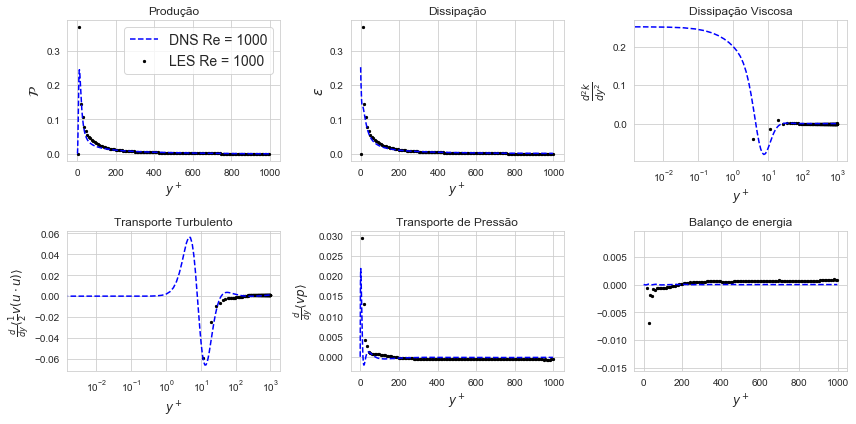

In [83]:
balanco_1000 = (P_1000.mean(axis=1) + nu_1000**.5*turbulent_transport_1000.mean(axis=1) + viscous_transport_1000 + 
                + pressure_transport_1000.mean(axis=1) - e_1000)

figure_energy = plt.figure(figsize=(12,6))

fig_pro_1000 = figure_energy.add_subplot(231)
plt.plot(kprof_re1000['y^+'], kprof_re1000['Production'], label = "DNS Re = 1000", color = 'b', ls = '--')
plt.scatter(iy_dev_1000, P_1000.mean(axis=1), color = 'k', label = "LES Re = 1000", s = 5)
plt.legend(fontsize=14)
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\mathcal{P}$",fontsize=14)
plt.title("Produção")

fig_diss_1000 = figure_energy.add_subplot(232)
plt.plot(kprof_re1000['y^+'], kprof_re1000['Viscous_Dissipation'], color = 'b', ls = '--')
plt.scatter(iy_dev_1000, e_1000, color = 'k', s = 5)
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\\varepsilon$",fontsize=14)
plt.title("Dissipação")

fig_vis_diss = figure_energy.add_subplot(233)
plt.plot(kprof_re1000['y^+'], kprof_re1000['Viscous_Transport'], color = 'b', ls = '--')
plt.scatter(iy_dev_1000, viscous_transport_1000, color = 'k', s =5)
plt.xscale("log")
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\\frac{d^2 k}{dy^2}$", fontsize=14)
plt.title("Dissipação Viscosa")

fig_turbulent_transport = figure_energy.add_subplot(234)
plt.plot(kprof_re1000['y^+'], kprof_re1000['Turbulent_Transport'], color = 'b', ls = '--')
plt.scatter(iy_dev_1000, 0.03162*turbulent_transport_1000.mean(axis=1), s = 5, color = 'k')
plt.xscale("log")
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\\frac{d}{dy} \\langle \\frac{1}{2} v (u \cdot u) \\rangle$", fontsize=12)
plt.title("Transporte Turbulento")

fig_pressure_transport = figure_energy.add_subplot(235)
plt.plot(kprof_re1000['y^+'], kprof_re1000['Pressure_Transport'], color = 'b', ls = '--')
plt.scatter(iy_dev_1000, pressure_transport_1000.mean(axis=1), s = 5, color = 'k')
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\\frac{d}{dy} \\langle vp \\rangle$", fontsize=12)
plt.title("Transporte de Pressão")

fig_balanco = figure_energy.add_subplot(236)
plt.scatter(iy_dev_1000[2:], balanco_1000[2:], s = 5, color = 'k')
plt.plot(kprof_re1000['y^+'], kprof_re1000['Balance'], color = 'b', ls = '--')
plt.xlabel("$y^+$", fontsize=12)
plt.title("Balanço de energia")

plt.tight_layout()
plt.show()

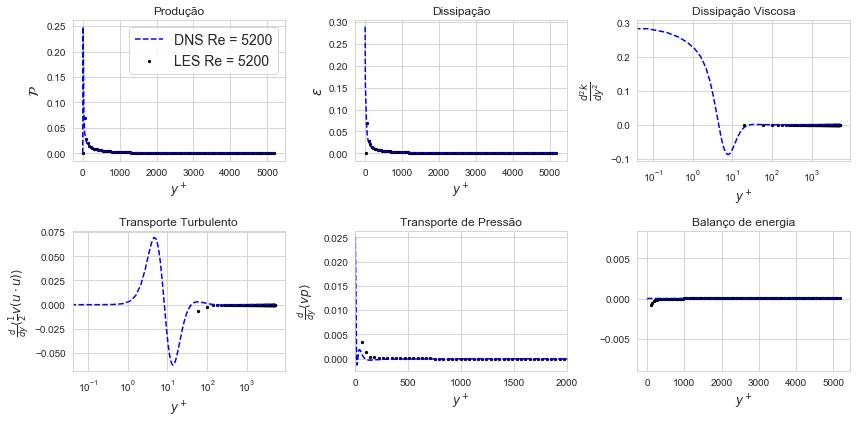

In [84]:
balanco_5200 = (P_5200.mean(axis=1) + nu_5200**.5*turbulent_transport_5200.mean(axis=1) + viscous_transport_5200 + 
                + pressure_transport_5200.mean(axis=1) - e_5200)

figure_energy = plt.figure(figsize=(12,6))

fig_pro_5200 = figure_energy.add_subplot(231)
plt.plot(kprof_re5200['y^+'], kprof_re5200['Production'], label = "DNS Re = 5200", color = 'b', ls = '--')
plt.scatter(iy_dev_5200, P_5200.mean(axis=1), color = 'k', label = "LES Re = 5200", s = 5)
plt.legend(fontsize=14)
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\mathcal{P}$",fontsize=14)
plt.title("Produção")

fig_diss_5200 = figure_energy.add_subplot(232)
plt.plot(kprof_re5200['y^+'], kprof_re5200['Viscous_Dissipation'], color = 'b', ls = '--')
plt.scatter(iy_dev_5200, e_5200, color = 'k', s = 5)
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\\varepsilon$",fontsize=14)
plt.title("Dissipação")

fig_vis_diss = figure_energy.add_subplot(233)
plt.plot(kprof_re5200['y^+'], kprof_re5200['Viscous_Transport'], color = 'b', ls = '--')
plt.scatter(iy_dev_5200, viscous_transport_5200, color = 'k', s =5)
plt.xscale("log")
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\\frac{d^2 k}{dy^2}$", fontsize=14)
plt.title("Dissipação Viscosa")

fig_turbulent_transport = figure_energy.add_subplot(234)
plt.plot(kprof_re5200['y^+'], kprof_re5200['Turbulent_Transport'], color = 'b', ls = '--')
plt.scatter(iy_dev_5200, 0.013867*turbulent_transport_5200.mean(axis=1), s = 5, color = 'k')
plt.xscale("log")
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\\frac{d}{dy} \\langle \\frac{1}{2} v (u \cdot u) \\rangle$", fontsize=12)
plt.title("Transporte Turbulento")

fig_pressure_transport = figure_energy.add_subplot(235)
plt.plot(kprof_re5200['y^+'], kprof_re5200['Pressure_Transport'], color = 'b', ls = '--')
plt.scatter(iy_dev_5200, pressure_transport_5200.mean(axis=1), s = 5, color = 'k')
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$\\frac{d}{dy} \\langle vp \\rangle$", fontsize=12)
plt.title("Transporte de Pressão")
plt.xlim(0,2000)

fig_balanco = figure_energy.add_subplot(236)
plt.scatter(iy_dev_5200[2:], balanco_5200[2:], s = 5, color = 'k')
plt.plot(kprof_re5200['y^+'], kprof_re5200['Balance'], color = 'b', ls = '--')
plt.xlabel("$y^+$", fontsize=12)
plt.title("Balanço de energia")

plt.tight_layout()

plt.show()

## Termos Individuais de energia

### Transporte Turbulento

$$ - \frac{\partial}{\partial x_k} \langle u_i u_j u_k\rangle$$

In [85]:
#RE1000
turbulent_transport_uu_1000 = -1*((UUV_1000 - UU_1000*V_1000 - 2*UV_1000*U_1000 + 2*U_1000*U_1000*V_1000 
                               + V_1000*U_1000*U_1000 - U_1000*U_1000*V_1000).diff())/dy_1000


turbulent_transport_vv_1000 = -1*((VVV_1000 - 3*VV_1000*V_1000 + 3*V_1000**3 - V_1000**3).diff())/dy_1000


turbulent_transport_ww_1000  = -1*((WWV_1000 - 2*VW_1000*W_1000 + V_1000*W_1000**2 - WW_1000*V_1000 + 
                                2*W_1000**2*V_1000 - W_1000**2 * V_1000).diff())/dy_1000

#RE5200
turbulent_transport_uu_5200 = -1*((UUV_5200 - UU_5200*V_5200 - 2*UV_5200*U_5200 + 2*U_5200*U_5200*V_5200 
                               + V_5200*U_5200*U_5200 - U_5200*U_5200*V_5200).diff())/dy_5200


turbulent_transport_vv_5200 = -1*((VVV_5200 - 3*VV_5200*V_5200 + 3*V_5200**3 - V_5200**3).diff())/dy_5200


turbulent_transport_ww_5200  = -1*((WWV_5200 - 2*VW_5200*W_5200 + V_5200*W_5200**2 - WW_5200*V_5200 + 
                                2*W_5200**2*V_5200 - W_5200**2 * V_5200).diff())/dy_5200

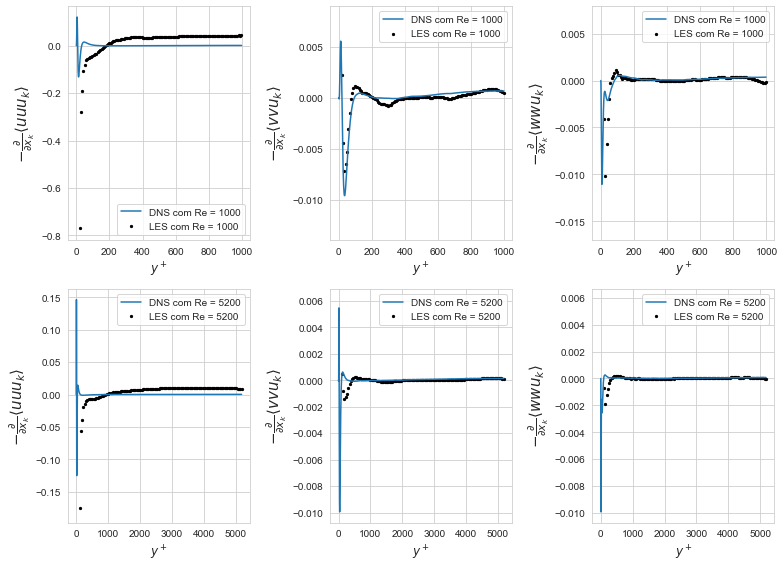

In [86]:
fig_tt = plt.figure(figsize=(11,8))

fig_tt_uu_1000 = fig_tt.add_subplot(231)
plt.scatter(iy_dev_1000[2:], turbulent_transport_uu_1000.mean(axis=1)[2:], label = "LES com Re = 1000", s = 5, color = 'k')
plt.plot(rste_re1000_uu['y^+'], rste_re1000_uu['Turbulent_Transport'], label = "DNS com Re = 1000")
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$- \\frac{\partial}{\partial x_k} \\langle u u u_k \\rangle$", fontsize=15)
plt.legend()

fig_tt_vv_1000 = fig_tt.add_subplot(232)
plt.scatter(iy_dev_1000[2:], turbulent_transport_vv_1000.mean(axis=1)[2:], label = "LES com Re = 1000",s = 5, color = 'k')
plt.plot(rste_re1000_vv['y^+'], rste_re1000_vv['Turbulent_Transport'], label = "DNS com Re = 1000")
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$- \\frac{\partial}{\partial x_k} \\langle v v u_k \\rangle$", fontsize=15)
plt.legend()

fig_tt_ww_1000 = fig_tt.add_subplot(233)
plt.scatter(iy_dev_1000[2:], turbulent_transport_ww_1000.mean(axis=1)[2:], label = "LES com Re = 1000", s = 5, color = 'k')
plt.plot(rste_re1000_ww['y^+'], rste_re1000_ww['Turbulent_Transport'], label = "DNS com Re = 1000")
#plt.ylim(-0.2,0.1)
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$- \\frac{\partial}{\partial x_k} \\langle w w u_k \\rangle$", fontsize=15)
plt.legend()


fig_tt_uu_5200 = fig_tt.add_subplot(234)
plt.scatter(iy_dev_5200[2:], turbulent_transport_uu_5200.mean(axis=1)[2:], label = "LES com Re = 5200", s = 5, color = 'k')
plt.plot(rste_re5200_uu['y^+'], rste_re5200_uu['Turbulent_Transport'], label = "DNS com Re = 5200")
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$- \\frac{\partial}{\partial x_k} \\langle u u u_k \\rangle$", fontsize=15)
plt.legend()

fig_tt_vv = fig_tt.add_subplot(235)
plt.scatter(iy_dev_5200[2:], turbulent_transport_vv_5200.mean(axis=1)[2:], label = "LES com Re = 5200",s = 5, color = 'k')
plt.plot(rste_re5200_vv['y^+'], rste_re5200_vv['Turbulent_Transport'], label = "DNS com Re = 5200")
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$- \\frac{\partial}{\partial x_k} \\langle v v u_k \\rangle$", fontsize=15)
plt.legend()

fig_tt_ww = fig_tt.add_subplot(236)
plt.scatter(iy_dev_5200[2:], turbulent_transport_ww_5200.mean(axis=1)[2:], label = "LES com Re = 5200", s = 5, color = 'k')
plt.plot(rste_re5200_ww['y^+'], rste_re5200_ww['Turbulent_Transport'], label = "DNS com Re = 5200")
plt.xlabel("$y^+$", fontsize=12)
plt.ylabel("$- \\frac{\partial}{\partial x_k} \\langle w w u_k \\rangle$", fontsize=15)

plt.legend()
plt.tight_layout()
plt.show()

### Produção

$$ \mathcal{P}_{ij} = - \langle u_i u_k \rangle \frac{\partial \langle U_j \rangle}{\partial x_k} - \langle u_k u_k\rangle \frac{\partial \langle U_i\rangle}{\partial x_k}$$

In [147]:
P11_1000 = (-2*tau_uv_1000*dict_aver_U_1000['aver_U_10'].diff()/dy_1000).mean(axis=1)
P12_5200 = (-2*tau_uv_5200*dict_aver_U_5200['aver_U_10'].diff()/dy_5200).mean(axis=1)

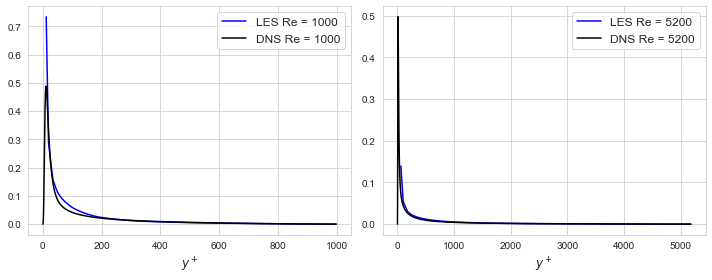

In [155]:
fig_production = plt.figure(figsize=(10,4))

fig_production_1000 = fig_production.add_subplot(121)
plt.plot(iy_dev_1000, P11_1000, color = 'b', label = "LES Re = 1000")
plt.plot(rste_re1000_uu['y^+'], rste_re1000_uu['Production'], color = 'k', label = "DNS Re = 1000")
plt.legend(fontsize=12)
plt.xlabel("$y^+$", fontsize=12)


fig_production_5200 = fig_production.add_subplot(122)
plt.plot(iy_dev_5200, P12_5200, color = 'b', label = "LES Re = 5200")
plt.plot(rste_re5200_uu['y^+'], rste_re5200_uu['Production'], color = 'k', label = "DNS Re = 5200")
plt.legend(fontsize=12)
plt.xlabel("$y^+$", fontsize=12)


plt.tight_layout()
plt.show()

In [159]:
rste_re5200_uu.columns

Index(['y/delta', 'y^+', 'Production', 'Turbulent_Transport',
       'Viscous_Transport', 'Pressure_Strain', 'Pressure_Transport',
       'Viscous_Dissipation', 'Balance'],
      dtype='object')

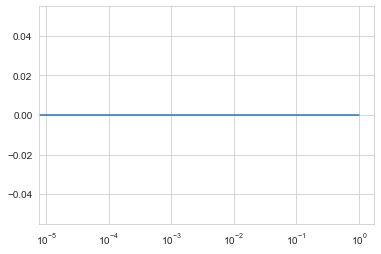

In [172]:
plt.plot(rste_re5200_ww['y/delta'],rste_re5200_ww['Pressure_Transport'])
plt.xscale("log")